# HW4 - Pandas exercises

We open with some imports as usual

In [1]:
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Some helpful functions 
just use these as be and don't worry too much about about them for now, we will learn how they work soon

In [2]:
# Same data manipulation to get USGS streamflow as
# a pandas dataframe as before
def create_usgs_url(site_no, begin_date, end_date):
    return (
        f'https://waterdata.usgs.gov/nwis/dv?'
        f'cb_00060=on&format=rdb&referred_module=sw&'
        f'site_no={site_no}&'
        f'begin_date={begin_date}&'
        f'end_date={end_date}'
    )

def open_usgs_data(site, begin_date, end_date):
    url = create_usgs_url((site), begin_date, end_date)
    response = urllib.request.urlopen(url)
    df = pd.read_table(
        response,
        comment='#',
        skipfooter=1,
        sep='\s+',
        names=['agency', 'site', 'date', 'streamflow (ft^3/s)', 'quality_flag'],
        index_col=2,
        #parse_dates=True,
        engine='python',
    ).iloc[2:]

    # Now convert the streamflow data to floats and
    # the index to datetimes. When processing raw data
    # it's common to have to do some extra postprocessing
    df['streamflow (ft^3/s)'] = df['streamflow (ft^3/s)'].astype(np.float64)
    df.index = pd.DatetimeIndex(df.index)
    return df

def open_daymet_data(lat, lon, begin_date, end_date):
    args = {'lat':  lat, 'lon': lon, 'format': 'csv',
            'start': begin_date, 'end': end_date}
    query = urllib.parse.urlencode(args)
    url = f"https://daymet.ornl.gov/single-pixel/api/data?{query}"
    response = urllib.request.urlopen(url)
    df = pd.read_csv(response, header=6)
    datestring = (df['year'].astype(str) + df['yday'].astype(str))
    dates = pd.to_datetime(datestring, format='%Y%j')
    df.index = pd.DatetimeIndex(dates)
    return df

# Additionally, setting some constants

In [3]:
site = '09506000'
begin_date = '1992-09-25'
end_date = '2022-09-25'
lat = 34.4483605
lon = -111.7898705

# Now open up some datasets from the above commands, you are almost to your exercises

In [5]:
verde_df = open_daymet_data(lat, lon, begin_date, end_date)
usgs_df = open_usgs_data(site, begin_date, end_date)
verde_df = verde_df.reindex(verde_df.index)
verde_df['streamflow (ft^3/s)'] = usgs_df['streamflow (ft^3/s)']
verde_df.head()

,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow (ft^3/s)
1992-09-25,1992,269,42469.79,0.0,413.81,0.0,33.57,12.92,1489.09,129.0
1992-09-26,1992,270,42337.25,0.0,419.69,0.0,34.03,12.61,1459.42,121.0
1992-09-27,1992,271,42204.86,0.0,436.54,0.0,34.89,11.41,1348.48,122.0
1992-09-28,1992,272,42072.64,0.0,421.55,0.0,35.44,12.82,1479.16,127.0
1992-09-29,1992,273,41940.63,0.0,380.67,0.0,33.42,14.18,1616.07,120.0


# 1. How do you get a listing of the columns in `verde_df`?

In [6]:
print(verde_df.columns)

Index(['year', 'yday', 'dayl (s)', 'prcp (mm/day)', 'srad (W/m^2)',
       'swe (kg/m^2)', 'tmax (deg c)', 'tmin (deg c)', 'vp (Pa)',
       'streamflow (ft^3/s)'],
      dtype='object')


# 2. How do you select the streamflow column in `verde_df`?

In [7]:
verde_strf = verde_df['streamflow (ft^3/s)']
print(verde_strf.head())

1992-09-25    129.0
1992-09-26    121.0
1992-09-27    122.0
1992-09-28    127.0
1992-09-29    120.0
Name: streamflow (ft^3/s), dtype: float64


# 3. How do you plot the streamflow in `verde_df`?

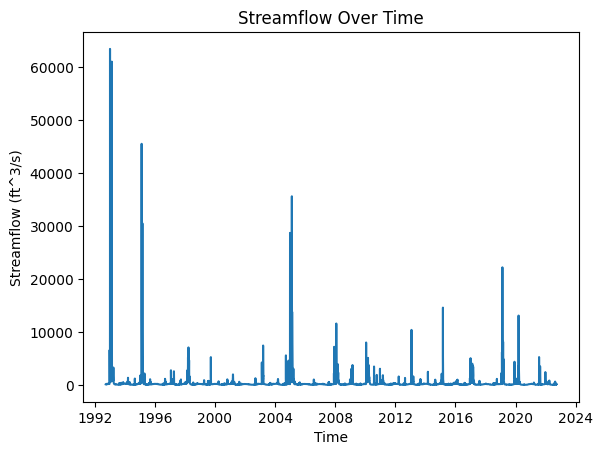

In [8]:
# Create a simple line plot
plt.plot(verde_strf)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Streamflow (ft^3/s)")
plt.title("Streamflow Over Time")

# Display the plot
plt.show()

# 4. What is the mean streamflow value for the 30 year period?

In [ ]:
print(f"Mean streamflow: {verde_strf.mean():.2f} ft^3/s")

Mean streamflow: 336.82 ft^3/s


# 5. What is the maximum value for the 30 year period?


In [9]:
print(f"Max streamflow: {verde_strf.max():,.2f} ft^3/s")

Max streamflow: 63,400.00 ft^3/s


# 6. How do you find the maximum streamflow value for each year?

In [ ]:
print(verde_df[['year', 'streamflow (ft^3/s)']].groupby('year').max().head())
# print(verde_df[['year', 'tmin (deg c)']].groupby('year').max().head())

      streamflow (ft^3/s)
year                     
1992               6600.0
1993              63400.0
1994               1370.0
1995              45500.0
1996               1170.0
      tmin (deg c)
year              
1992         14.18
1993         23.70
1994         22.85
1995         23.27
1996         23.44


# 7. How do you make a scatter plot of `dayl (s)` versus `tmax (deg c)`?
#### INFO: `dayl` is the day length in seconds and `tmax` is the daily maximum temperature

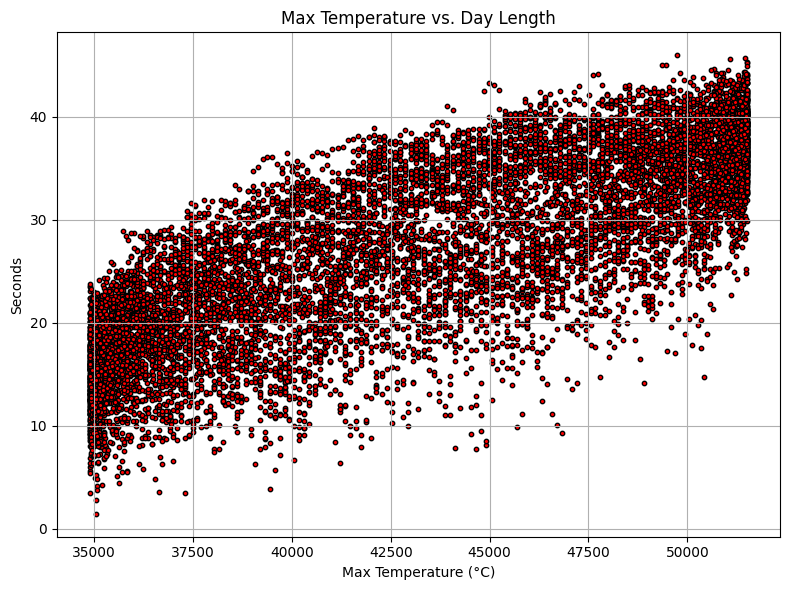

In [11]:
day1 = 'dayl (s)'
tmax = 'tmax (deg c)'

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(
    verde_df[day1], # x-axis data bin
    verde_df[tmax], # y-axis data bin
    label=None,
    color="red",
    edgecolor='black',
    s=10
)

plt.title(f'Max Temperature vs. Day Length', fontdict={'fontsize': 12, 'color': 'black'})
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Seconds")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. How do you calculate (and plot) the mean daily minimum temperature for each day of year?  And plot it?
#### INFO: Daily minimum temperature is in the column `tmin (deg c)`

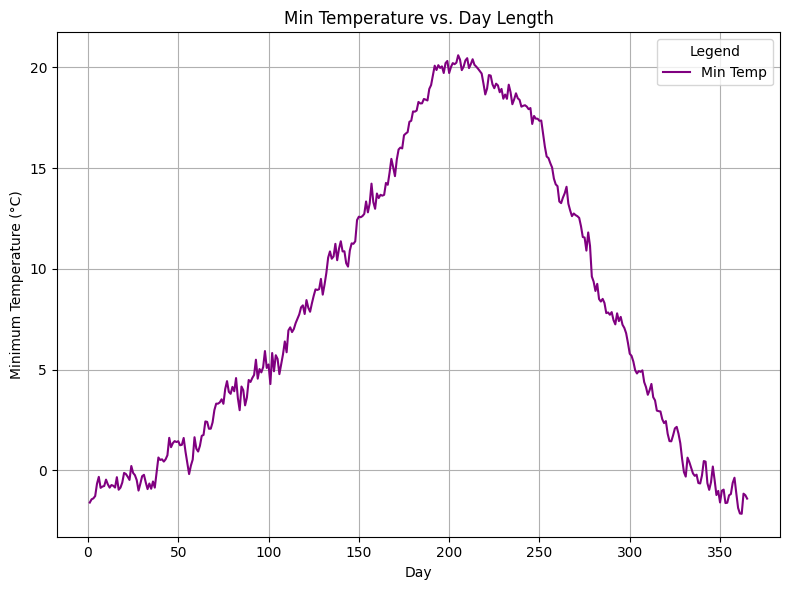

In [25]:
tmin = 'tmin (deg c)'
# i = [x for x in range(len(verde_df.index)+1)]
# Create scatterplot
plt.figure(figsize=(8, 6))
plt.plot(
    verde_df['tmin (deg c)'].groupby(verde_df.index.dayofyear).mean(),
    label='Min Temp',
    color="purple"
)

plt.title(f'Min Temperature vs. Day Length', fontdict={'fontsize': 12, 'color': 'black'})
plt.xlabel("Day")
plt.ylabel("Minimum Temperature (°C)")
plt.legend(title='Legend', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Building a streamlined workflow

For the previous exercises you may have noticed I gave you both the site ID and the lat/lon. Ideally, we should be able to just give you the site ID and get the lat/lon from the USGS site. This will be your task for this exercise. You can retrieve site metadata from the USGS from the following site:

https://waterdata.usgs.gov/nwis/inventory?search_criteria=search_site_no&submitted_form=introduction

Use this tool to retrieve the tabular data for the Verde river at the site 09506000. You will need to select 3 columns:

- Decimal Latitude
- Decimal Longitude
- Drainage Area (returned in square miles)

You will also need to toggle the "Site-description information displayed in" radio button and select "tab-separated format" from the drop down. Once you have retrieved the table, use it to build a function that lets you put in any site ID and get the lat/lon and drainage area.

Then, use this function to get the lat/lon and drainage area for the site 09498500 (SALT RIVER NEAR ROOSEVELT, AZ).

In [35]:
def get_usgs_site_info(site_id):
    url = f"https://waterdata.usgs.gov/nwis/inventory?search_site_no={site_id}&search_site_no_match_type=exact&group_key=NONE&format=sitefile_output&sitefile_output_format=rdb&column_name=dec_lat_va&column_name=dec_long_va&column_name=drain_area_va&list_of_search_criteria=search_site_no"
    response = urllib.request.urlopen(url)
    df = pd.read_table(       
        response,
        comment='#',
        skiprows=[25],
        sep='\s+',
        engine='python',
    )

    # Pull out the data
    lat = df['dec_lat_va'].item()
    lon = df['dec_long_va'].item()
    area = df['drain_area_va'].item()

    return lat, lon, area

In [40]:
names = ['Verde River', 'Salt River']
site_id = ['09506000', '09498500']

water_ways = {names[i]:[get_usgs_site_info(site)] for i, site in enumerate(site_id)}

for name in names:
    lat, lon, area_mi2 = water_ways[name][0]
    print(f"{name} - Latitude: {lat}, Longitude: {lon}, Drainage Area: {area_mi2} sq mi")


Verde River - Latitude: 34.4483605, Longitude: -111.7898705, Drainage Area: 5009.0 sq mi
Salt River - Latitude: 33.61916667, Longitude: -110.92208333, Drainage Area: 4306.0 sq mi


## 10. Calculating the Runoff ratio

From the site info, open the USGS streamflow and Daymet data using the previously defined functions for the period 1990-01-01 to 2020-01-01. Calculate the yearly total (sum) precipitation and streamflow values. From this, calculate the yearly runoff ratio, which is simply the ratio of the total runoff to total precipitation. You will need to convert the streamflow from cubic feet per second to mm of flow. Use the given conversion factors to do these conversions. Finally, make a histogram plot showing the distribution of runoff ratios over the full period.

**Note**: The Daymet data is extracted from a single pixel from a 1x1 km grid, but for our purposes assume this is the total over the entire basin. 

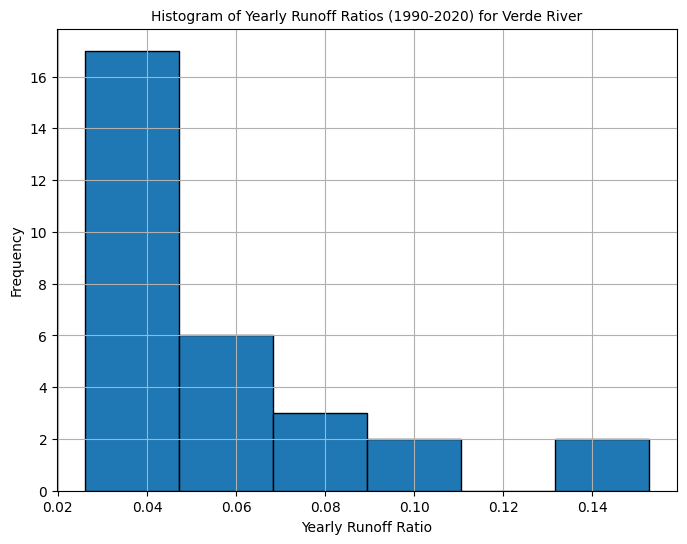

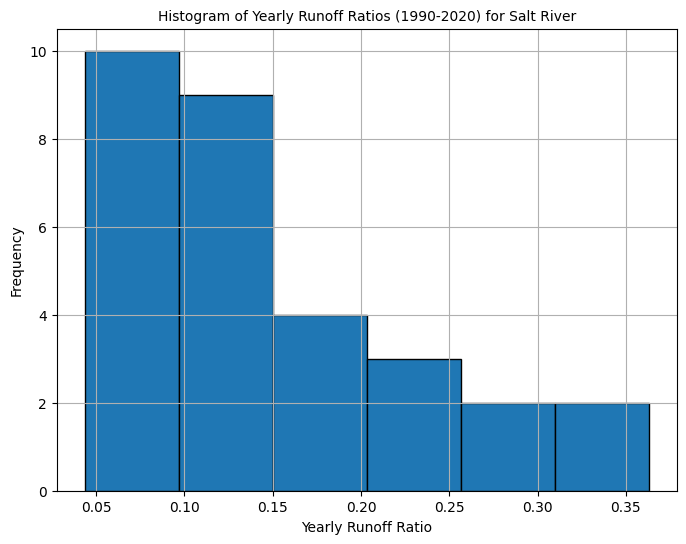

In [50]:
seconds_per_day = 86400
m3_per_ft3 = 0.0283
m2_per_km2 = 1e6
mm_per_m = 1000
km2_per_mi2 = 2.59

begin_date = '1990-01-01'
end_date = '2020-01-01'

for i, ww in enumerate(water_ways):
	lat, lon, area_mi2 = water_ways[names[i]][0]
	area_km2 = area_mi2 * km2_per_mi2

	salt_df = open_daymet_data(lat, lon, begin_date, end_date)
	usgs_df = open_usgs_data(site_id[i], begin_date, end_date)

	salt_df = salt_df.reindex(salt_df.index)
	salt_df['streamflow (ft^3/s)'] = usgs_df['streamflow (ft^3/s)']
	# salt_df = salt_df.fillna(0.0)

	yearly = salt_df[['year', 'streamflow (ft^3/s)', 'prcp (mm/day)']].groupby('year').sum()
	yearly['runoff (mm/day)'] = yearly['streamflow (ft^3/s)'] * seconds_per_day * m3_per_ft3 / area_km2 / m2_per_km2 * mm_per_m
	ratio = yearly['runoff (mm/day)'] / yearly['prcp (mm/day)']

	plt.figure(figsize=(8, 6))
	plt.hist(ratio, bins=6, edgecolor='black')
	plt.xlabel('Yearly Runoff Ratio')
	plt.ylabel('Frequency')
	plt.title(f'Histogram of Yearly Runoff Ratios (1990-2020) for {names[i]}', fontdict={'fontsize': 10, 'color': 'black'})
	plt.grid(True)
	plt.show()


